In [25]:
# Generating Signals for E Mini on daily Timeframe with 6 months of Data

In [65]:
# Installing Libraries
#!pip install numpy
#!pip install pandas
#!pip install yfinance
#!pip install seaborn as sns

In [36]:
# Importing Libraries
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns

In [28]:
# Downloading 6 months of Daily data
df= yf.download("ES=F", period= "6mo", interval ="1d")

[*********************100%***********************]  1 of 1 completed


In [29]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-05,3828.50,3857.75,3744.00,3834.00,3834.00,2031501
2022-07-06,3838.00,3875.00,3808.75,3848.25,3848.25,1684324
2022-07-07,3853.75,3914.25,3832.50,3905.00,3905.00,1314443
2022-07-08,3897.00,3922.00,3868.00,3901.25,3901.25,1485497
2022-07-11,3900.00,3900.75,3850.00,3856.75,3856.75,1486103
...,...,...,...,...,...,...
2022-12-23,3850.00,3872.50,3821.25,3869.75,3869.75,1374913
2022-12-27,3878.00,3900.50,3837.25,3855.00,3855.00,1006414
2022-12-28,3858.00,3875.00,3804.50,3807.50,3807.50,1282810


In [37]:
# Find correlation among features
df.corr().round(2)

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,0.98,0.98,0.94,0.94,-0.51
High,0.98,1.00,0.98,0.97,0.97,-0.48
Low,0.98,0.98,1.00,0.98,0.98,-0.54
Close,0.94,0.97,0.98,1.00,1.00,-0.50
Adj Close,0.94,0.97,0.98,1.00,1.00,-0.50
Volume,-0.51,-0.48,-0.54,-0.50,-0.50,1.00


In [38]:
matrix=df.corr().round(2)
matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,0.98,0.98,0.94,0.94,-0.51
High,0.98,1.00,0.98,0.97,0.97,-0.48
Low,0.98,0.98,1.00,0.98,0.98,-0.54
Close,0.94,0.97,0.98,1.00,1.00,-0.50
Adj Close,0.94,0.97,0.98,1.00,1.00,-0.50
Volume,-0.51,-0.48,-0.54,-0.50,-0.50,1.00


<AxesSubplot: >

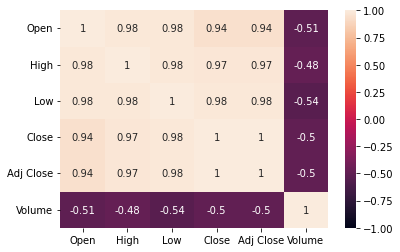

In [61]:
# Generating Heatmap
sns.heatmap(df.corr().round(2), vmin=-1, vmax=1, annot=True)

In [41]:
# Unstacking for values
matrix = matrix.unstack()
matrix

Open       Open         1.00
           High         0.98
           Low          0.98
           Close        0.94
           Adj Close    0.94
           Volume      -0.51
High       Open         0.98
           High         1.00
           Low          0.98
           Close        0.97
           Adj Close    0.97
           Volume      -0.48
Low        Open         0.98
           High         0.98
           Low          1.00
           Close        0.98
           Adj Close    0.98
           Volume      -0.54
Close      Open         0.94
           High         0.97
           Low          0.98
           Close        1.00
           Adj Close    1.00
           Volume      -0.50
Adj Close  Open         0.94
           High         0.97
           Low          0.98
           Close        1.00
           Adj Close    1.00
           Volume      -0.50
Volume     Open        -0.51
           High        -0.48
           Low         -0.54
           Close       -0.50
           Adj

In [66]:
# Highly positively correlated
matrix[matrix>0.95]

Open       Open         1.00
           High         0.98
           Low          0.98
High       Open         0.98
           High         1.00
           Low          0.98
           Close        0.97
           Adj Close    0.97
Low        Open         0.98
           High         0.98
           Low          1.00
           Close        0.98
           Adj Close    0.98
Close      High         0.97
           Low          0.98
           Close        1.00
           Adj Close    1.00
Adj Close  High         0.97
           Low          0.98
           Close        1.00
           Adj Close    1.00
Volume     Volume       1.00
dtype: float64

In [67]:
# Highly negatively correlated
matrix[matrix<-0.90]

Series([], dtype: float64)